# Breast Cancer Prediction


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv('/content/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [14]:
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
469,911366,B,11.62,18.18,76.38,408.8,0.11750,0.14830,0.10200,0.05564,...,25.40,88.14,528.1,0.1780,0.2878,0.3186,0.14160,0.2660,0.09270,NaN
440,909411,B,10.97,17.20,71.73,371.5,0.08915,0.11130,0.09457,0.03613,...,26.87,90.14,476.4,0.1391,0.4082,0.4779,0.15550,0.2540,0.09532,NaN
434,908469,B,14.86,16.94,94.89,673.7,0.08924,0.07074,0.03346,0.02877,...,20.54,102.30,777.5,0.1218,0.1550,0.1220,0.07971,0.2525,0.06827,NaN
117,864729,M,14.87,16.67,98.64,682.5,0.11620,0.16490,0.16900,0.08923,...,27.37,127.10,1095.0,0.1878,0.4480,0.4704,0.20270,0.3585,0.10650,NaN
405,904971,B,10.94,18.59,70.39,370.0,0.10040,0.07460,0.04944,0.02932,...,25.58,82.76,472.4,0.1363,0.1644,0.1412,0.07887,0.2251,0.07732,NaN


In [15]:
df.set_index('id' , inplace=True)

df.drop(columns=['Unnamed: 32'] , inplace=True)

In [16]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=42)

In [18]:
model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train , y_train)

y_pred = model.predict(X_test)

accuracy_score(y_test , y_pred)

0.9590643274853801

# Implememnting PCA from stratch

In [22]:
# Step 1 :- Mean Centering
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

In [24]:
# Step 2 :- Calculating Covariance matrix
cov_matrix = np.cov(X_train_scaled.T)

In [27]:
eigen_value , eigen_vector = np.linalg.eig(cov_matrix)

In [36]:
pre_contri_to_var = (eigen_value / np.sum(eigen_value)) * 100

In [37]:
pre_contri_to_var

array([4.31674797e+01, 1.98456518e+01, 9.73315919e+00, 6.53157416e+00,
       5.21215121e+00, 4.19895964e+00, 2.26346091e+00, 1.68266865e+00,
       1.29469004e+00, 1.20940991e+00, 1.05718541e+00, 8.99278095e-01,
       8.09411361e-01, 5.10761728e-01, 2.82723938e-01, 2.29310126e-01,
       1.98205581e-01, 1.79731659e-01, 1.66263238e-01, 3.88199283e-04,
       2.53024192e-03, 4.96327267e-03, 2.44129784e-02, 2.23185341e-02,
       5.03380563e-02, 5.68800600e-02, 1.05609966e-01, 7.82753227e-02,
       9.03926694e-02, 9.18143445e-02])

In [80]:
cumulative_var = np.cumsum(pre_contri_to_var)

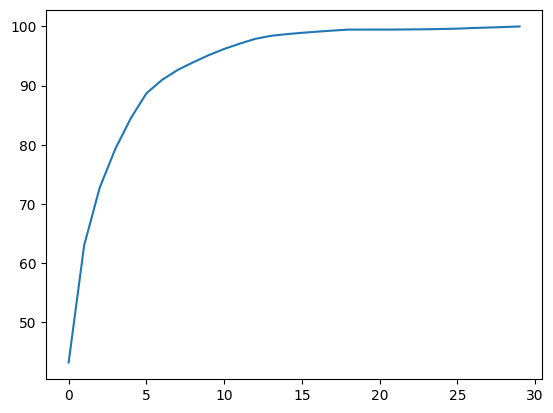

In [40]:
plt.plot(np.cumsum(pre_contri_to_var))

In [54]:
k = 7
W = eigen_vector[: , :k]

X_train_pca = X_train_scaled.dot(W)
X_test_pca = X_test_scaled.dot(W)

In [55]:
model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train_pca , y_train)

y_pred = model.predict(X_test_pca)

accuracy_score(y_test , y_pred)

0.9649122807017544

In [65]:
import plotly.express as px

fig = px.scatter_3d(df , x='radius_mean' , y='texture_mean' , z='perimeter_mean' , color='diagnosis')

In [66]:
fig.show()

In [74]:
new_df = pd.DataFrame(X_train_pca , columns=['PC1' , 'PC2' , 'PC3' , 'PC4' , 'PC5' , 'PC6' , 'PC7'])
new_df['diagnosis'] = y_train

In [78]:
px.scatter_3d(new_df , x='PC1' , y='PC2' , z='PC3' , color='diagnosis')

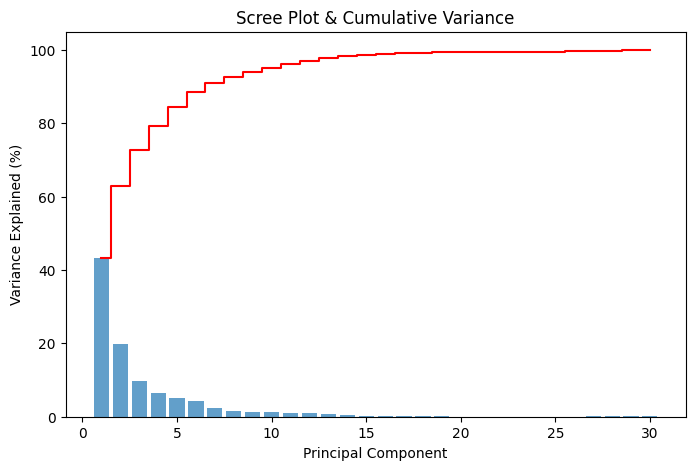

In [81]:
plt.figure(figsize=(8,5))
plt.bar(range(1, len(pre_contri_to_var)+1), pre_contri_to_var, alpha=0.7)
plt.step(range(1, len(cumulative_var)+1), cumulative_var, where='mid', color='red')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained (%)')
plt.title('Scree Plot & Cumulative Variance')
plt.show()


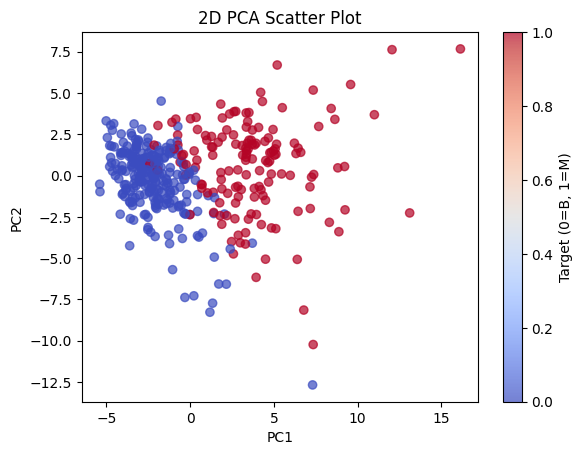

In [86]:
# Map 'B' -> 0, 'M' -> 1
y_numeric = y_train.map({'B': 0, 'M': 1})

plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_numeric, cmap='coolwarm', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D PCA Scatter Plot')
plt.colorbar(label='Target (0=B, 1=M)')
plt.show()


# PCA using scikit learn

In [89]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

print("Accuracy after PCA (library):", accuracy_score(y_test, y_pred))

Accuracy after PCA (library): 0.9649122807017544
